In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Model ,load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adamax ,Adam
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix

# Set a seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
TEST_dataset_path = '/kaggle/input/teeth-dataset/Teeth_Dataset/Training'

Total benign images: 480
Total malignant images: 450
Total malignant images: 360
Total malignant images: 540
Total malignant images: 324
Total malignant images: 540
Total malignant images: 393


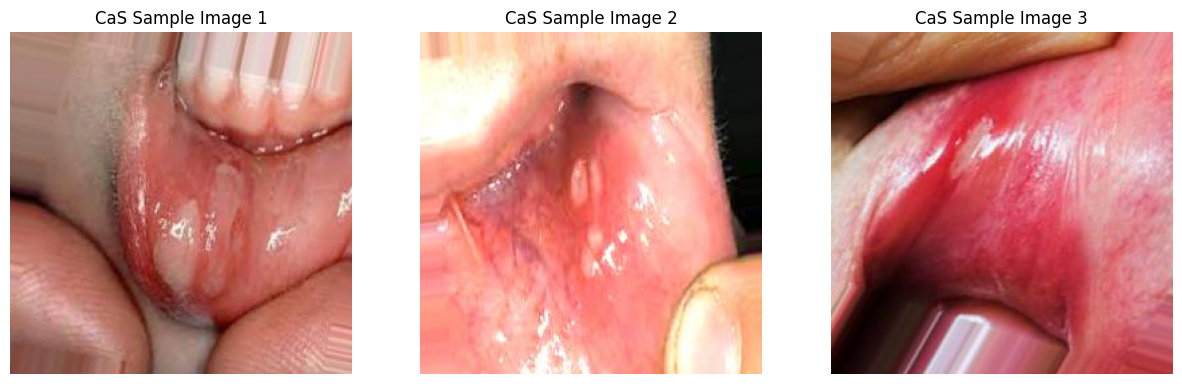

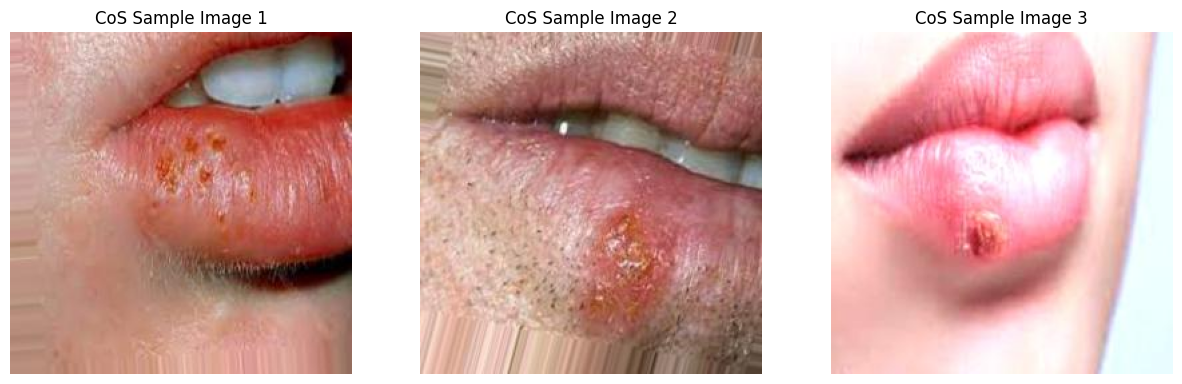

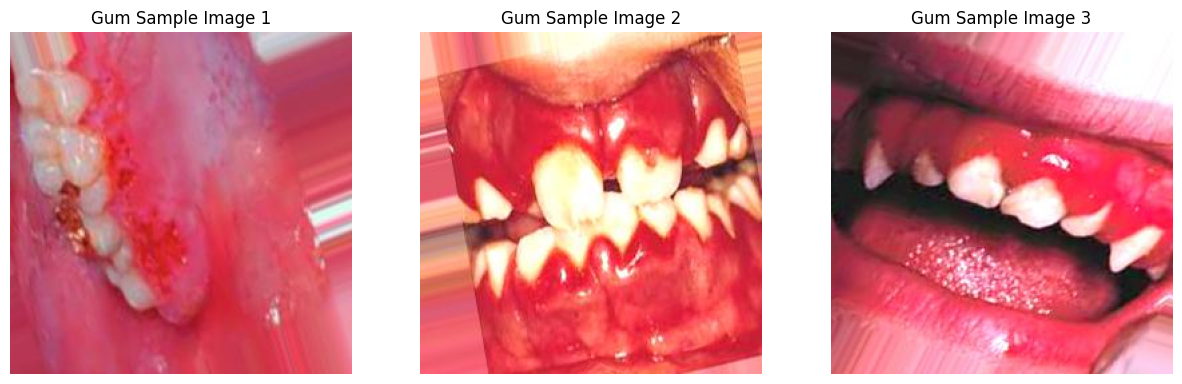

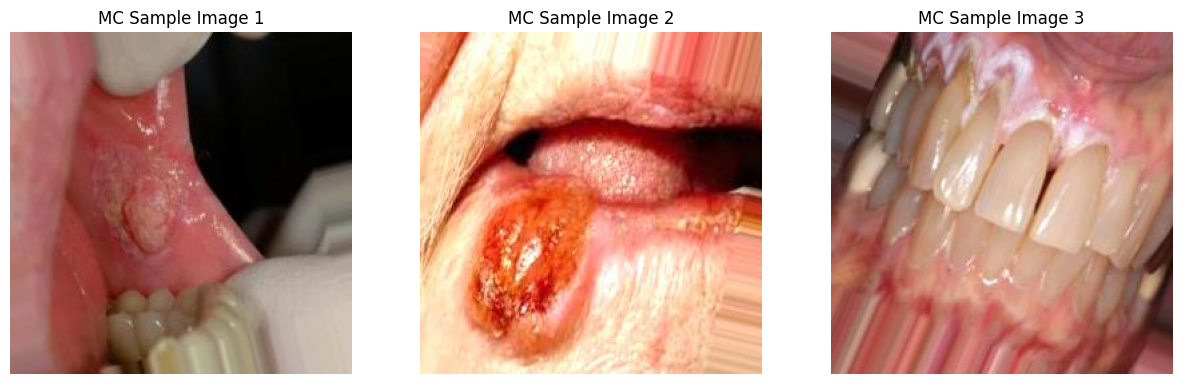

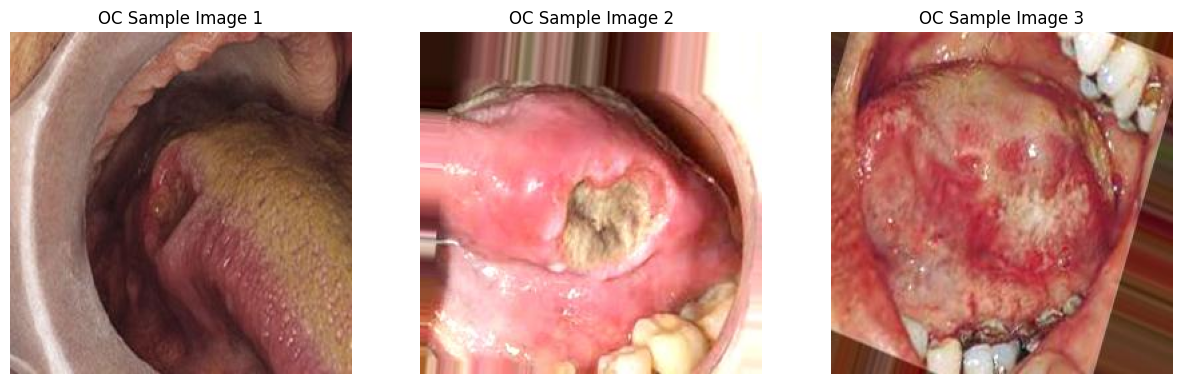

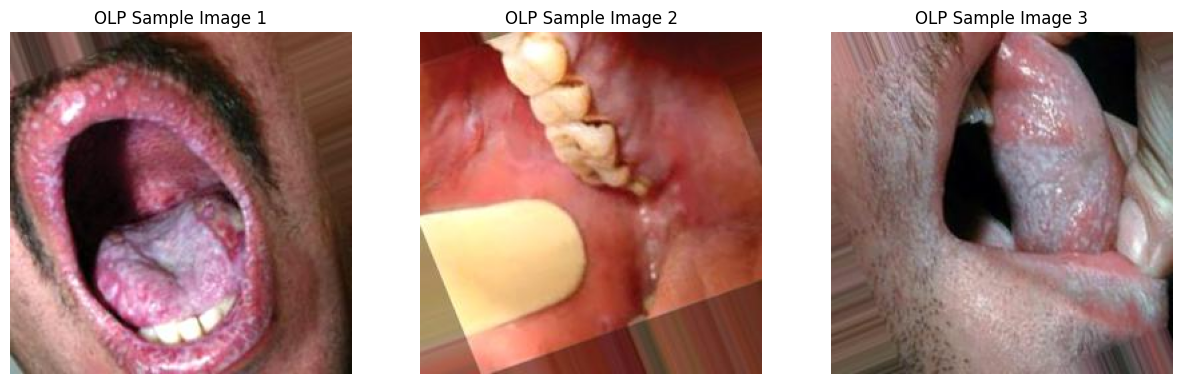

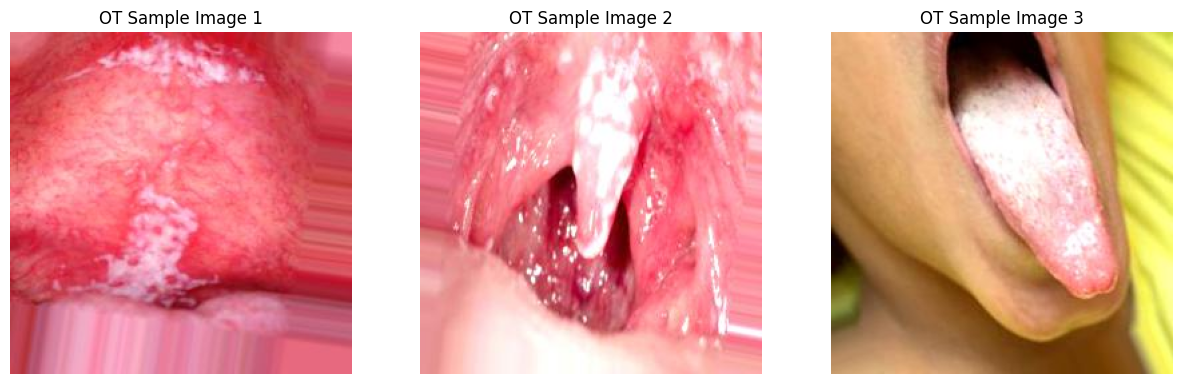

In [3]:
CaS_path = os.path.join(TEST_dataset_path, 'CaS')
CoS_path = os.path.join(TEST_dataset_path, 'CoS')
Gum_path = os.path.join(TEST_dataset_path, 'Gum')
MC_path = os.path.join(TEST_dataset_path, 'MC')
OC_path = os.path.join(TEST_dataset_path, 'OC')
OLP_path = os.path.join(TEST_dataset_path, 'OLP')
OT_path = os.path.join(TEST_dataset_path, 'OT')


# Count images in each folder
CaS_images = len(os.listdir(CaS_path))
CoS_images = len(os.listdir(CoS_path))
Gum_images = len(os.listdir(Gum_path))
MC_images = len(os.listdir(MC_path))
OC_images = len(os.listdir(OC_path))
OLP_images = len(os.listdir(OLP_path))
OT_images = len(os.listdir(OT_path))

# Print the total number of images in each category
print(f"Total benign images: {CaS_images}")
print(f"Total malignant images: {CoS_images}")
print(f"Total malignant images: {Gum_images}")
print(f"Total malignant images: {MC_images}")
print(f"Total malignant images: {OC_images}")
print(f"Total malignant images: {OLP_images}")
print(f"Total malignant images: {OT_images}")
# Function to display multiple sample images from a category
def display_samples(image_paths, title, num_samples=3):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        img_path = image_paths[i]
        img = cv2.imread(img_path)  # Read the image
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"{title} {i + 1}")
        plt.axis('off')
    plt.show()

# Get all image paths for each category
CaS_images_list = os.listdir(CaS_path)
CoS_images_list = os.listdir(CoS_path)
Gum_images_list = os.listdir(Gum_path)
MC_images_list = os.listdir(MC_path)
OC_images_list = os.listdir(OC_path)
OLP_images_list = os.listdir(OLP_path)
OT_images_list = os.listdir(OT_path)

# Display 3 sample images from each category
display_samples([os.path.join(CaS_path, img) for img in CaS_images_list[:3]], 'CaS Sample Image')
display_samples([os.path.join(CoS_path, img) for img in CoS_images_list[:3]], 'CoS Sample Image')
display_samples([os.path.join(Gum_path, img) for img in Gum_images_list[:3]], 'Gum Sample Image')
display_samples([os.path.join(MC_path, img) for img in MC_images_list[:3]], 'MC Sample Image')
display_samples([os.path.join(OC_path, img) for img in OC_images_list[:3]], 'OC Sample Image')
display_samples([os.path.join(OLP_path, img) for img in OLP_images_list[:3]], 'OLP Sample Image')
display_samples([os.path.join(OT_path, img) for img in OT_images_list[:3]], 'OT Sample Image')

In [4]:
import os
import pandas as pd

data_dir = '/kaggle/input/teeth-dataset/Teeth_Dataset'
target_folder = 'Testing'
filepath = []
labels = []
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        if os.path.isdir(fpath):
            fipath = os.listdir(fpath)
            for image in fipath:
                path = os.path.join(fpath, image)
                filepath.append(path)
                labels.append(f)  # Assuming f is the label

# Create DataFrame
f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
test_data = pd.concat([f_series, l_series], axis=1)

# Display the first few rows
print(test_data.head())

# Check data types
print(test_data.dtypes)

# Check for missing values
print(test_data.isnull().sum())

# Show dataset statistics
print(test_data.describe())

                                            filepath labels
0  /kaggle/input/teeth-dataset/Teeth_Dataset/Test...     OC
1  /kaggle/input/teeth-dataset/Teeth_Dataset/Test...     OC
2  /kaggle/input/teeth-dataset/Teeth_Dataset/Test...     OC
3  /kaggle/input/teeth-dataset/Teeth_Dataset/Test...     OC
4  /kaggle/input/teeth-dataset/Teeth_Dataset/Test...     OC
filepath    object
labels      object
dtype: object
filepath    0
labels      0
dtype: int64
                                                 filepath labels
count                                                1508   1508
unique                                               1508     10
top     /kaggle/input/teeth-dataset/Teeth_Dataset/Test...    OLP
freq                                                    1    180


In [5]:
test_data

filepath labels
0     /kaggle/input/teeth-dataset/Teeth_Dataset/Test...     OC
1     /kaggle/input/teeth-dataset/Teeth_Dataset/Test...     OC
2     /kaggle/input/teeth-dataset/Teeth_Dataset/Test...     OC
3     /kaggle/input/teeth-dataset/Teeth_Dataset/Test...     OC
4     /kaggle/input/teeth-dataset/Teeth_Dataset/Test...     OC
...                                                 ...    ...
1503  /kaggle/input/teeth-dataset/Teeth_Dataset/Test...    OLP
1504  /kaggle/input/teeth-dataset/Teeth_Dataset/Test...    OLP
1505  /kaggle/input/teeth-dataset/Teeth_Dataset/Test...    OLP
1506  /kaggle/input/teeth-dataset/Teeth_Dataset/Test...    OLP
1507  /kaggle/input/teeth-dataset/Teeth_Dataset/Test...    OLP

[1508 rows x 2 columns]

In [6]:
test_counts=test_data['labels'].value_counts()
test_counts

labels
OLP        180
MC         180
out        160
outputs    160
output     160
CaS        160
CoS        149
OT         131
Gum        120
OC         108
Name: count, dtype: int64

In [7]:
index_names = test_data[ (test_data['labels'] != 'MC') & (test_data['labels'] != 'CaS') &(test_data['labels'] != 'CoS')&(test_data['labels'] != 'Gum')&(test_data['labels'] != 'OC')&(test_data['labels'] != 'OLP')&(test_data['labels'] != 'OT')].index 
test_data.drop(index_names, inplace = True) 

In [8]:
test_counts=test_data['labels'].value_counts()
test_counts

labels
OLP    180
MC     180
CaS    160
CoS    149
OT     131
Gum    120
OC     108
Name: count, dtype: int64

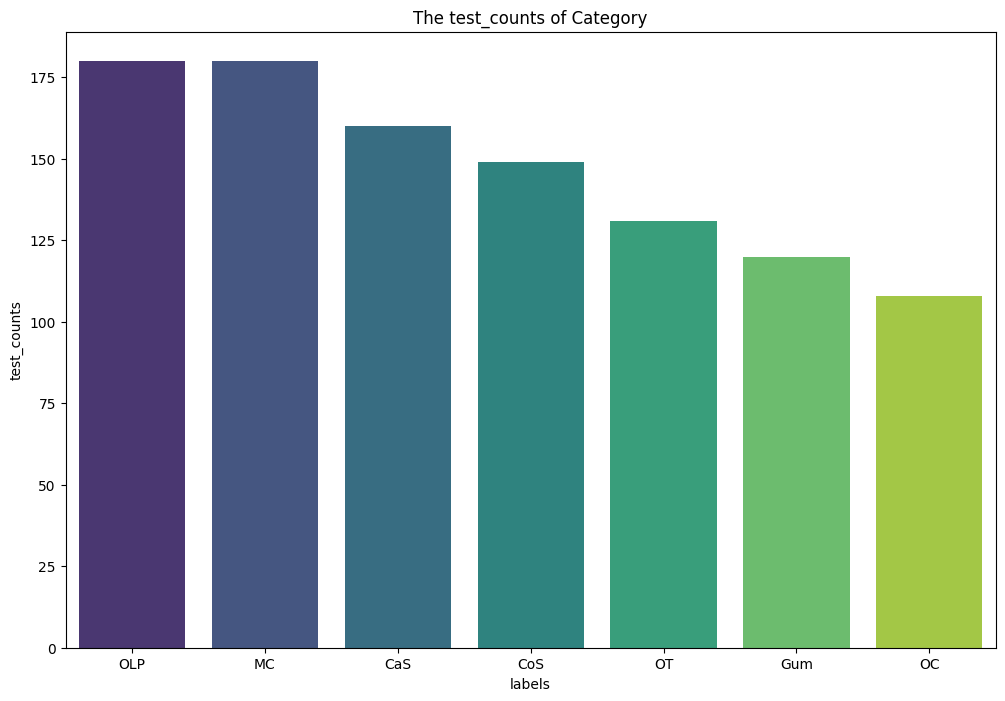

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x=test_counts.index,y=test_counts.values,palette='viridis')
plt.title('The test_counts of Category')
plt.xlabel('labels')
plt.ylabel('test_counts')
plt.show()


In [10]:
data_dir='/kaggle/input/teeth-dataset/Teeth_Dataset'
target_folder='Training'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)  

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
train_data = pd.concat([f_series, l_series], axis=1)
# Display the first few rows
print(train_data.head())

# Check data types
print(train_data.dtypes)

# Check for missing values
print(train_data.isnull().sum())

# Show dataset statistics
print(train_data.describe())

                                            filepath labels
0  /kaggle/input/teeth-dataset/Teeth_Dataset/Trai...     OC
1  /kaggle/input/teeth-dataset/Teeth_Dataset/Trai...     OC
2  /kaggle/input/teeth-dataset/Teeth_Dataset/Trai...     OC
3  /kaggle/input/teeth-dataset/Teeth_Dataset/Trai...     OC
4  /kaggle/input/teeth-dataset/Teeth_Dataset/Trai...     OC
filepath    object
labels      object
dtype: object
filepath    0
labels      0
dtype: int64
                                                 filepath labels
count                                                3087   3087
unique                                               3087      7
top     /kaggle/input/teeth-dataset/Teeth_Dataset/Trai...    OLP
freq                                                    1    540


In [11]:
train_counts=train_data['labels'].value_counts()
train_counts

labels
OLP    540
MC     540
CaS    480
CoS    450
OT     393
Gum    360
OC     324
Name: count, dtype: int64

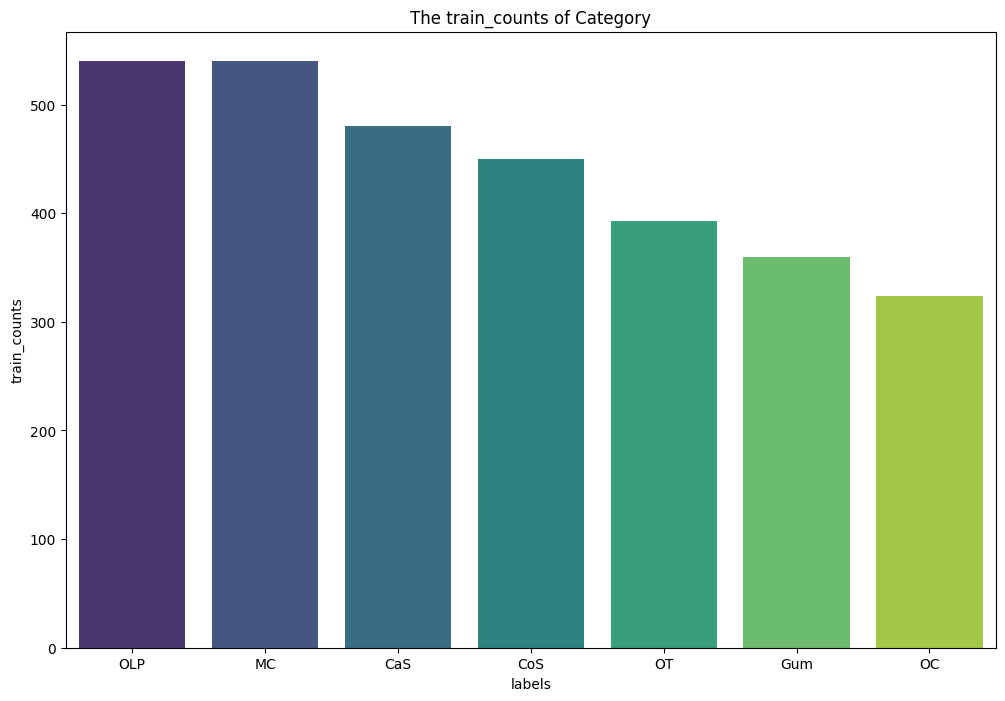

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x=train_counts.index,y=train_counts.values,palette='viridis')
plt.title('The train_counts of Category')
plt.xlabel('labels')
plt.ylabel('train_counts')
plt.show()

In [13]:
data_dir='/kaggle/input/teeth-dataset/Teeth_Dataset'
target_folder='Validation'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)  

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
valid_data = pd.concat([f_series, l_series], axis=1)
# Display the first few rows
print(valid_data.head())

# Check data types
print(valid_data.dtypes)

# Check for missing values
print(valid_data.isnull().sum())

# Show dataset statistics
print(valid_data.describe())

                                            filepath labels
0  /kaggle/input/teeth-dataset/Teeth_Dataset/Vali...     OC
1  /kaggle/input/teeth-dataset/Teeth_Dataset/Vali...     OC
2  /kaggle/input/teeth-dataset/Teeth_Dataset/Vali...     OC
3  /kaggle/input/teeth-dataset/Teeth_Dataset/Vali...     OC
4  /kaggle/input/teeth-dataset/Teeth_Dataset/Vali...     OC
filepath    object
labels      object
dtype: object
filepath    0
labels      0
dtype: int64
                                                 filepath labels
count                                                1028   1028
unique                                               1028      7
top     /kaggle/input/teeth-dataset/Teeth_Dataset/Vali...    OLP
freq                                                    1    180


In [14]:
valid_counts=valid_data['labels'].value_counts()
valid_counts

labels
OLP    180
MC     180
CaS    160
CoS    149
OT     131
Gum    120
OC     108
Name: count, dtype: int64

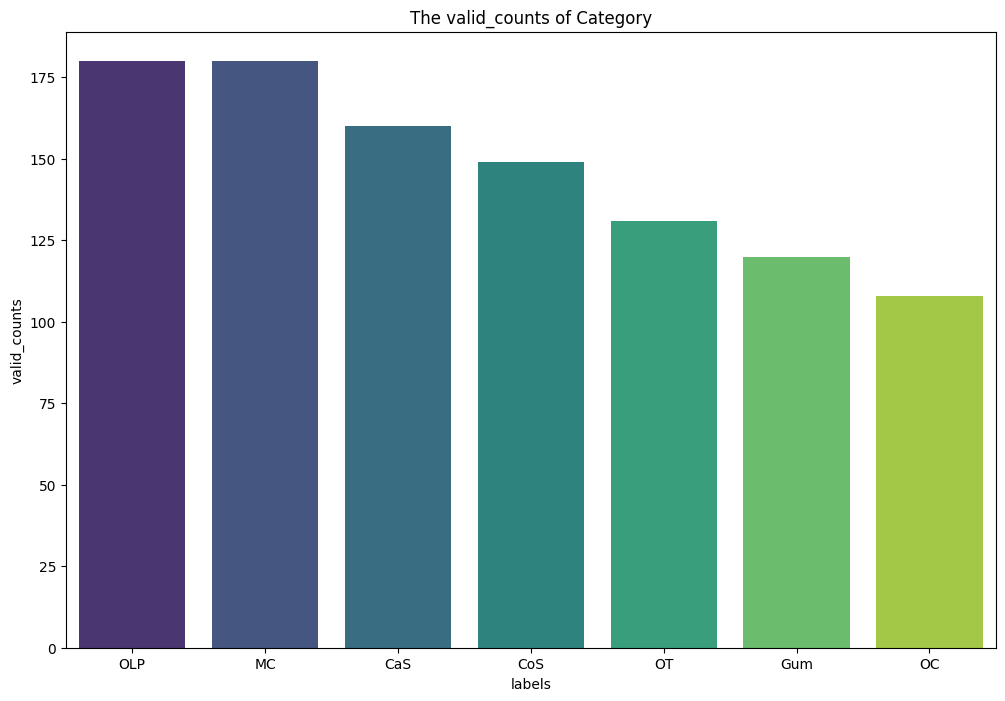

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x=valid_counts.index,y=valid_counts.values,palette='viridis')
plt.title('The valid_counts of Category')
plt.xlabel('labels')
plt.ylabel('valid_counts')
plt.show()

In [16]:
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_data, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_data, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe(test_data, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 3087 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(7, activation='softmax')  
])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,002,119 (202.19 MB)

 Trainable params: 53,000,199 (202.18 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [18]:
history = model.fit(
    train_gen,
    epochs=50,  # Increased for better learning
    validation_data=valid_gen,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.2420 - loss: 3.5364
Epoch 1: val_accuracy improved from -inf to 0.17023, saving model to best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 665ms/step - accuracy: 0.2429 - loss: 3.5246 - val_accuracy: 0.1702 - val_loss: 2.0415
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.3947 - loss: 1.9121
Epoch 2: val_accuracy improved from 0.17023 to 0.37160, saving model to best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 285ms/step - accuracy: 0.3949 - loss: 1.9117 - val_accuracy: 0.3716 - val_loss: 1.6547
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.5278 - loss: 1.4269
Epoch 3: val_accuracy improved from 0.37160 to 0.45720, saving model to best_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.5277 - loss: 1.4262 - val_accuracy: 0.4572 - val_loss: 1.5200
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.5929 - loss: 1.1605
Epoch 4: val_accuracy improved from 0.45720 to 0.

In [19]:
# Load the best model from the checkpoint
best_model = load_model('best_model.keras')

# Evaluate the model on the test dataset
test_loss, test_accuracy = best_model.evaluate(test_gen, verbose=2)

# Print the evaluation results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

17/17 - 5s - 305ms/step - accuracy: 0.8356 - loss: 0.6108
Test Loss: 0.6108
Test Accuracy: 0.8356


In [20]:
# Evaluate the best model on the test set
test_loss, test_accuracy = model.evaluate(test_gen)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.8225 - loss: 0.7157
Test Loss: 0.6108
Test Accuracy: 0.84


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step


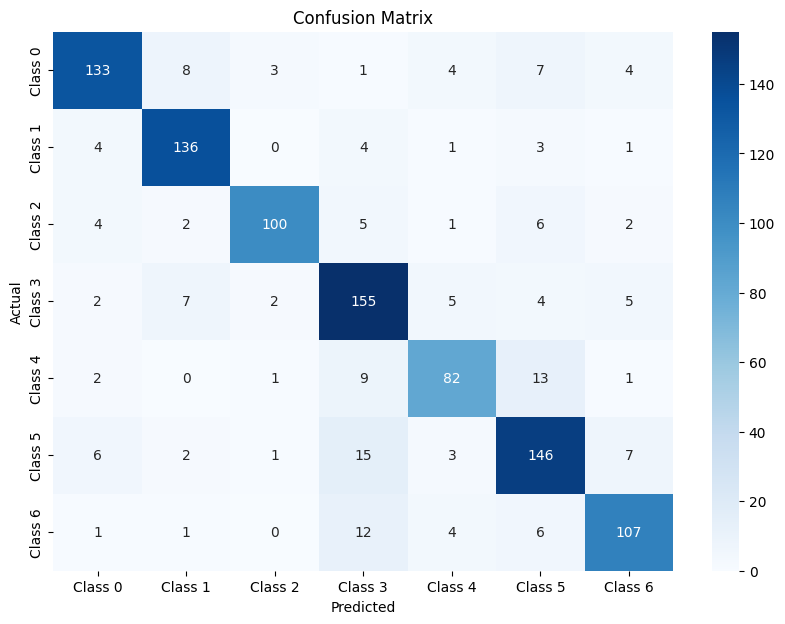

              precision    recall  f1-score   support

     Class 0       0.88      0.83      0.85       160
     Class 1       0.87      0.91      0.89       149
     Class 2       0.93      0.83      0.88       120
     Class 3       0.77      0.86      0.81       180
     Class 4       0.82      0.76      0.79       108
     Class 5       0.79      0.81      0.80       180
     Class 6       0.84      0.82      0.83       131

    accuracy                           0.84      1028
   macro avg       0.84      0.83      0.84      1028
weighted avg       0.84      0.84      0.84      1028



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set using the test generator
y_pred_prob = best_model.predict(test_gen)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Get the predicted class labels

# Get the true labels from the generator
y_true = test_gen.classes  # True labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1","Class 2","Class 3","Class 4","Class 5","Class 6"], yticklabels=["Class 0", "Class 1","Class 2","Class 3","Class 4","Class 5","Class 6"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=["Class 0", "Class 1","Class 2","Class 3","Class 4","Class 5","Class 6"])
print(class_report)